# 1. Introduction

Taxes play an important role for every individual in the economy. The size of the tax payment affects the disposible income, and thus the (possible) consumption level. The government collects taxes in order to finance its expenditures. The literatture has estimated that an increase in the marginal tax rate induces people to work less. This implies that the government cannot set a too high marginal tax rate in order to maximize its revenue. In the end, both workers and the government benefit from an optimal tax system. In this project, we examine the change of behaviour of a worker due to a change in the marginal tax rate. We will further try to estimate the tax rate that maximizes the tax revenue by drawing a sample of agents with different abilities and preferences using `np.random`.

In this project, we only consider changes on the intensive margin, i.e. how people adjust their work hours or/and effort due to changes in the marginal tax rate, and not if they change employment status due to a change in the marginal tax rate. Feldstein (1995) argues that taxable income as endogenous variable is better when estimating changes in behaviour due to changes in the marginal tax rate, since taxable income captures changes in hours worked and changes in work effort. We apply the same method as Feldstein (1995) and consider the change in taxable income from changes in the marginal tax rate. 

# 2. Model description

We consider the utility function given by 

$U_i = c_i - \frac{\alpha _i}{1+\frac{1}{\epsilon}} ( \frac{z _i}{ \alpha _i})^ {1+ \frac{1}{\epsilon}}$

where $c_i$ denotes consumption of the individual, while $z_i$ denotes the taxable income of the individual. $\alpha _i$ denotes the potential earnings level of the individual, and $\epsilon$ denotes the elasticity of taxable income with respect to the net-of-tax rate. 

The consumption level is dependent of the taxable income. Thus, we consider the budget constraint given by

$c_i = z_i - T(z_i)$

where $T(z_i)$ is the tax payment. This implies that we assume that the individual uses all of his disposible income on consumption. The tax payment is given by 

$T(z_i) = m*z_i$ 

where $m$ is the marginal tax rate chosen by the government. Since the tax rate is independent of earnings, we consider a proportional tax system.

We want to maximize the utility of the individual subject to his budget constraint, i.e.

$\max\limits_{z_i} U_i=c_i - \frac{\alpha _i}{1+\frac{1}{\epsilon}} ( \frac{z _i}{ \alpha _i})^ {1+ \frac{1}{\epsilon}}$ s.t. $c_i = z_i - T(z_i)$

# 3. Solutions

First, we find the analytical solution. Thus, we find the optimal taxable income of the individual subject to the tax rate. 
Second, we show the graphical solution. Here, we see the optimum of the indifference curve, the budget constraint and the optimum of the individual.

## 3.1 Analytical solution

We import the `sympy`-package in order to define the variables and parameters. Afterwards, we use the `.init_printing`-function, so the variables are written in a pretty way. Lastly, we define the variables and parameters.

In [1]:
# 1) Import sympy in order to write nice equations.
import sympy as sm

# 2) Define that we want the variables printed in a pretty way.
sm.init_printing(use_unicode=True)

# 3) Define the different variables and parameters.
U    = sm.symbols('U')
c    = sm.symbols('c')
z    = sm.symbols('z')
eps  = sm.symbols('epsilon')
T_z  = sm.symbols('T(z)')
mtax = sm.symbols('m')
alp  = sm.symbols('alpha')

We define the different functions. In total, we consider three different functions: the utility function, the budget constraint and the tax payment. The last two functions are functions of taxable income. 

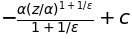

In [2]:
# Define utility function.
utility = c - alp/(1+1/eps)*(z/alp)**(1+1/eps)
utility

In [3]:
# Define budget constraint.
budget_constraint = sm.Eq(c, z - T_z)
budget_constraint

In [4]:
# Define tax payment.
taxpay = sm.Eq(T_z, mtax*z)
taxpay

In the next step, we want to substitute the tax payment into the budget constraint.

In [5]:
# 1) Isolate T_z in the tax payment (this is done already, but to make sure, we run this line of code).
tax_solve = sm.solve(taxpay, T_z)

# 2) Define that we want the tax payment substituted into the budget constraint.
budget_constraint_sub = budget_constraint.subs(T_z, tax_solve[0])

# 3) Ensure that the budget constraint is correct after the substitution. 
budget_constraint_sub

Now, we want to substitute the budget constraint into the utility function. This is done in the same way as before. 

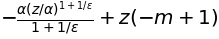

In [6]:
# 1) Isolate c in the budget constraint (this is done already, but to make sure, we run this line of code).
budget_constraint_solve = sm.solve(budget_constraint_sub, c)

# 2) Define that we want the budget constraint substituted into the utility function.
utility_sub = utility.subs(c, budget_constraint_solve[0])

# 3) Ensure that the utility function is correct after the substitution. 
utility_sub

We have concluded that the utility function is defined in the right way. After substitution, the utility function does only depend of the taxable income (and parameters, but these are fixed). 
In order to find the optimal level of taxable income, we differentiate the utility function with respect to taxable income. Afterwards, we isolate for taxable income to derive the optimal level of taxable income ($z^*$). 

In [7]:
# 1) Define that we want to calculate the derivate of the utility function with respect to taxable income.
foc = sm.diff(utility_sub, z)

# 2) Define that we want to isolate for taxable income to derive z*.
z_star = sm.solve(foc, z)

# 3) Define the optimal level of taxable income as a Python-function. 
z_star_func = sm.lambdify((mtax, alp, eps), z_star)

# 4) Examine the optimal level of taxable income.
z_star

We note that the optimal level of taxable income depends on the marginal tax rate, the potential earnings and the elasticity of taxable income with respect to the net-of-tax rate. In the special case where the individual face no taxes, i.e. where $m=0$, his taxable income will equal his potential earnings ($z _i ^* = \alpha _i$). 
Furthermore, we note that the taxable income is lowered more due to an increase in the tax rate when the elasticity of taxable income is high. 

## 3.2 Graphical solution


We can show how people change behaviour due to a change in the marginal tax rate. As noticed before, the marginal tax rate and the elasticity of taxable income affect how much people deviate from their potential earnings. This can be shown in a graph where one can examine the changes in taxable income when the parameters are changed. In order to do that, we need to define different functions.

First, we import the `numpy`-package. Afterwards, we define a function for the budget constraint and the utility function. In the utility function, we insert the solution given by $z^*$ instead of $z$. We are then possible to determine the optimal consumption level which is a function of the optimal taxable income. Finally, we isolate consumption and keep utility fixed in order to draw an indifference curve .

In [8]:
# 1) Import the numpy-package.
import numpy as np

# 2) Define the budget constraint.
def budget_con_fuc(m):
    return (1-m)*z
budget_con = np.array(range(2))

# 3) Define the utility function. 
def value_of_choice(alpha, epsilon, m):
    # The utility is
    utility_f = (1-m)*(alpha*(1-m)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-m)**epsilon/alpha)**(1+1/epsilon)   
    return utility_f

# 3) Define the consumption level determined by the optimal taxable income.
def y(budget_con, m): 
    return budget_con*(1-m)

# 4) Define the consumption level as a function of the fixed utility and taxable income.
def utility_function(budget_con, alpha, epsilon, m):
    u = value_of_choice(alpha, epsilon, m)
    return u + alpha/(1+1/epsilon)*(budget_con/alpha)**(1+1/epsilon)

We want to plot the utility function, the budget constraint and the optimal taxable income. The optimal taxable income is given by the point where the budget constraint is tangent to the utility function (which is marked with a bullet on the graph). 

In order to do so, we import the `matplotlib`-package in order to plot the graphs. Furthermore, we import the `ipywidgets`-package in order to generate interactive sliders. 

In [9]:
# Import packages in order to plot the graph and generate sliders. 
import matplotlib.pyplot as plt
import ipywidgets as widgets
plt.style.use('ggplot')

In [10]:
# 1) Generate the graph.     
def graph(alpha, epsilon, tax=0.3):
    plt.figure(figsize=(12,6))
    budget_con = np.arange(0.0, alpha, 1)
    plt.plot(budget_con, utility_function(budget_con, alpha, epsilon, tax))
    plt.plot(budget_con, y(budget_con, tax))
    z_opt = (alpha*(1-tax)**epsilon)
    print("The optimal taxable income is: " + str(round(z_opt)))
    plt.plot(z_opt, (1-tax)*z_opt, 'ro')
    plt.ylabel('Consumption')
    plt.xlabel('Taxable income')
    plt.legend(['Indifference curve','Budget constraint', 'Optimum'])
    return    

# 2) Generate the sliders. 
widget_alpha = widgets.FloatSlider(
    value = 5000,
    min=100,
    max=10000,
    step=100,
    description='α:',
    readout_format='.0f',
    width = 1000,
    layout={'width': '500px'}
)

widget_epsilon = widgets.FloatSlider(
    value = 0.8,
    min=0.01,
    max=2,
    step=0.01,
    description='$\epsilon$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

widget_m = widgets.FloatSlider(
    value = 0.5,
    min=0.0,
    max=1,
    step=0.01,
    description='$m$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

# 3) Print the graph
widgets.interact(graph,
    alpha=widget_alpha, epsilon=widget_epsilon, tax=widget_m 
);

interactive(children=(FloatSlider(value=5000.0, description='α:', layout=Layout(width='500px'), max=10000.0, m…

The graph confirms the conclusion from section 3.1. 
$z^*$ increases when $\alpha$ increases. This is obvious since one gets a higher income when his potential earnings increases everything else equal. 
$z^*$ decreases when $m$ increases. When the marginal tax rate increases, leisure is cheaper, and hence people tend to substitute work for leisure which lowers the taxable income. 
$z^*$ decreases when $\epsilon$ increases. When the elasticity of taxable income increases, people respond more to a change in the marginal tax rate. The greater the elasticity, the greater the response. Hence, an increase in the elasticity of taxable income lowers taxable income due to larger labor supply responses. 

## 3.3 The tax rate that maximizes the tax revenue

Until know we have only looked at the individual agent's optimization problem. We will examine how the govenment should tax the individuals to maximize the tax revenue. We do this considering the following draw of $N$ individuals with the preferences and abilities as follows
    $$ \begin{eqnarray*}
     &  & \,\,\,\gamma^{j}=(|\alpha^{j}|,|\epsilon^{j}|)\\
     &  & \,\,\,\widehat{\gamma^{j}}=(\alpha^{j},\epsilon^{j}) \\ 
     &  & \,\,\,\widehat{\gamma^{j}} \sim \mathcal{N}(\mu,\Sigma) \\
     &  & \,\,\,\mu=(\mu_{\alpha},\mu_\epsilon) \\
     &  & \,\,\, \Sigma = \begin{bmatrix}
    \sigma_{\alpha}^2       & \sigma_{\alpha, \epsilon}  \\
    \sigma_{\alpha, \epsilon}   & \sigma_{\epsilon}^2 
    \end{bmatrix}
    \end{eqnarray*} $$

Below we define a function which draws $N$ observations from the distribution defined above.

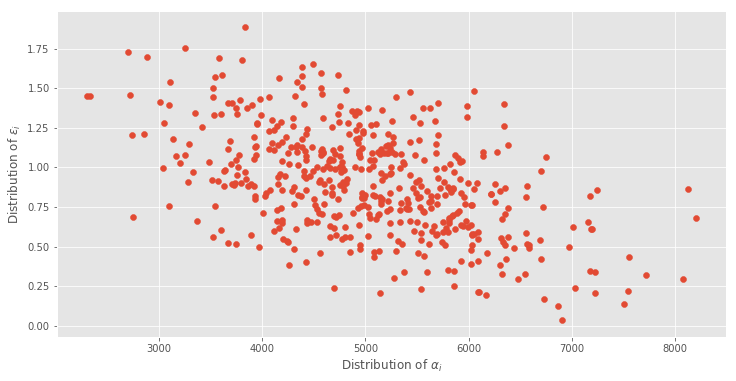

In [11]:
def draw(N = 500, mu_alpha = 5000, mu_epsilon = 0.9, sigma_alpha = 1000000, sigma_epsilon = 0.1, correlation = -0.5):
    # 1) Define an array which contains mu_alpha and mu_epsilon
    mu = np.array([mu_alpha,mu_epsilon])
    
    # 2) Calculate the covariance between alpha and epsilon based on the correlation
    sigma_alp_eps = correlation * (sigma_epsilon * sigma_alpha)**0.5
    
    # 3) Define an array which contains the covariance matrix
    Sigma = np.array([[sigma_alpha, sigma_alp_eps], [sigma_alp_eps, sigma_epsilon]])

    # 4) Set the seed and draw the sample 
    seed = 2019
    np.random.seed(seed)
    draw = np.random.multivariate_normal(mu, Sigma, size=N)

    # 5) Extract alphas and epsilons from the draw and make sure they are all positive
    global alphas, epsilons
    alphas = np.absolute(draw[:,0])
    epsilons = np.absolute(draw[:,1])
    return

# 6) Plot the distribution of alphas and epsilons
draw()
plt.figure(figsize=(12,6))
plt.scatter(alphas,epsilons)
plt.ylabel('Distribution of $\epsilon_i$')
plt.xlabel('Distribution of $α_i$')
plt.show()

We will now define a function which returns the tax revenue as a function of $\alpha_i$, $\epsilon_i$ and the tax rate.  We will then define another function, which returns the tax revenue times -1 as a function of only the tax rate given the values of $\alpha_i$ and $\epsilon_i$ from the draw. This function has the nice property that it is easy to minimize using `optimize.minimize`. The result from this minization process will be the tax rate which maximizes the tax revenue.

In [12]:
from scipy import optimize

# 1) Define function which returns the tax revenue
def tax_revenue(alpha, epsilon, tax):
    # 1.1) Find the tax revenue from each agent
    tax_indi = alpha*(1-tax)**epsilon * tax
    
    # 1.2) Aggregate all the tax provenues
    tax_revenue = sum(tax_indi)
    return tax_revenue

# 2) Define function that return the tax revenue as a function of the tax rate for the alphas and epsilons drawn earlier
def tax_maximize(tax):
    t = tax_revenue(alphas, epsilons, tax) * -1
    return t

# 3) Define function which maximizes the tax provenue using the tax_maximize(tax) function
def find_maximizing_tax(initial_guess=0.1):
    # 3.1) Set the lower and upper bound
    low_bound = 0
    high_bound = 1-1e-5
    bounds = ((low_bound,high_bound),)
    
    # 3.2) Use the optimize.minimize to find the maximizing tax rate
    result = optimize.minimize(tax_maximize, initial_guess, bounds=bounds)
    return result

draw()

# 4) Store the optimal tax rate and the corresponding tax revenue.
results_max = find_maximizing_tax(initial_guess=0.1)
max_tax_rate_old = results_max.x
max_tax_rate = max_tax_rate_old[0]
max_tax_rev = results_max.fun

Given the standard parameters from the draw, we print the maximizing tax rate and the corresponding tax revenue.

In [13]:
print(f'The optimal tax rate is given by {max_tax_rate:.2f}')
print(f'The corresponding tax revenue is given by {-max_tax_rev:.0f}')

The optimal tax rate is given by 0.56
The corresponding tax revenue is given by 710528


We will now use the tax_optimize function to plot a Laffer curve with slider to change the parameters of $\mu_\alpha$, $\mu_\epsilon$, $\sigma^2_\alpha$, $\sigma^2_\epsilon$, $\sigma_{\alpha,\epsilon}$

In [14]:
import matplotlib

# 1) Define the interval for which the tax rate can be in [0,1], and turn this into a dataframe.
tax_rate_int = np.arange(0.0, 1.0, 0.01)
tax_table = pd.DataFrame({'taxrate':tax_rate_int})

# 2) Define a function which return the tax revenue for differnet tax levels.
def tax_revenue_df(row):
    t = tax_maximize(row['taxrate'])
    return -t

# 3) Define function which plot the Laffer curve.
def Laffer(mu_alpha = 5000, mu_epsilon = 0.9, sigma_alpha = 50000, sigma_epsilon = 0.1, correlation = 1):
    
    # 3.1) Make a draw given the parameters specified in this function
    draw(mu_alpha = mu_alpha, mu_epsilon = mu_epsilon, sigma_alpha = sigma_alpha, sigma_epsilon = sigma_epsilon, correlation = correlation)
    
    # 3.2) Calculate the tax revenues for different tax rates.
    tax_table[z] = tax_table.apply(tax_revenue_df, axis=1)
    
    # 3.3) Plot the tax revenues as a function of tax rates.
    plt.figure(figsize=(12,6))
    plt.plot(tax_table['taxrate'],tax_table[z], color='b')
    t = find_maximizing_tax(0.1)
    tax = t.x[0] * 100
    plt.plot(t.x[0],-t.fun,'ro')
    plt.axvline(x=t.x[0], linewidth=1, color='r', linestyle='dashed')
    plt.axhline(y=-t.fun, linewidth=1, color='r', linestyle='dashed')
    axes = plt.gca()
    axes.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    print(f'The tax revenue maximizing tax rate is: {tax:.3f} pct. with a tax revenue of {-t.fun:,.0f}')
    plt.show()
    return
   
# 4) Customize widgets
widget_mua = widgets.FloatSlider(
    value = 5000,
    min=10,
    max=10000,
    step=100,
    description='$\mu_a$:',
    readout_format='.0f',
    width = 1000,
    layout={'width': '500px'}
)

widget_mue = widgets.FloatSlider(
    value = 1,
    min=0,
    max=3,
    step=0.01,
    description='$\mu_{\epsilon}$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

widget_sigmaa = widgets.FloatSlider(
    value = 50000,
    min=1000,
    max=100000,
    step=1000,
    description='$\sigma_a^2$:',
    readout_format='.0f',
    width = 1000,
    layout={'width': '500px'}
)

widget_sigmae = widgets.FloatSlider(
    value = 0.1,
    min=0,
    max=3,
    step=0.01,
    description='$\sigma^2_{ \epsilon}$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

widget_corr = widgets.FloatSlider(
    value = -0.5,
    min=-1,
    max=1,
    step=0.01,
    description='$\sigma_{ a, \epsilon} $:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

# 5) Call the Laffer curve with widgets
widgets.interact(Laffer,
    mu_alpha = widget_mua, mu_epsilon = widget_mue, sigma_alpha = widget_sigmaa, sigma_epsilon = widget_sigmae, correlation = widget_corr, 
);

interactive(children=(FloatSlider(value=5000.0, description='$\\mu_a$:', layout=Layout(width='500px'), max=100…

The graph above shows that the tax revenue maximizing tax rate varies between around 25 pct. to 99,99 pct. depending on the parameters. The value of $\mu_\epsilon$ have a great influence on the tax revenue maximizing tax rate.

# 4. Further analysis

Previously, we considered a proportional tax system where everyone faced the same marginal tax rate for any income level. However, most Western contries have a progressive tax system where people with high incomes face a higher marginal tax rate. Thus, we examine the optimal taxable income when the individual face a tax system where the marginal tax rate to the right of a threshold is higher than to the left of the threshold.

## 4.1 Extension of the baseline model

We consider the same equations as in section 2. However, the function which defines the tax payment is different now. The tax payment is given by

$T_{new} (z_i) = min(z_i, K) * m + max(z_i - K, 0) * m_H$

where $K$ is the threshold, and $m_H$ is the marginal tax rate faced by high-income earners (people with an income above the threshold). 

We note that if $z_i \leq K$ then there is no change from before, and the optimal tax rate is identical to the solution in section 3. An individual with an income above the threshold face the tax payment 

$T_{H} (z_i) = K * m + (z_i - K) * m_H$

## 4.2 Analytical solution

As mentioned in section 4.1, the introduction of the new tax system does not change anything from before for people with an income below the threshold. High-income earners respond in another way than before, and hence we calculate the optimal taxable income for them. 
The steps in this section is in most cases identical with the steps in section 3.2.

First, we define the new symbols and the new tax system for high-income earners. 

In [15]:
# 1) Define symbols.
T_H_z   = sm.symbols('T_{H}(z)')
m_H     = sm.symbols('m_H')
Kn      = sm.symbols('K')

# 2) Define new tax system.
taxhigh = sm.Eq(T_H_z, mtax*Kn + m_H*(z-Kn))
taxhigh

We insert the new function of tax payment into the budget constraint.

In [16]:
# 1) Isolate T_z in the tax payment (this is done already, but to make sure, we run this line of code).
tax_high_solve = sm.solve(taxhigh, T_H_z)

# 2) Define that we want the tax payment substituted into the budget constraint.
budget_constraint_high_sub = budget_constraint.subs(T_z, tax_high_solve[0])

# 3) Ensure that the budget constraint is correct after the substitution. 
budget_constraint_high_sub

We insert the new budget constraint into the utility function.

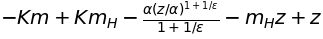

In [17]:
# 1) Isolate c in the budget constraint (this is done already, but to make sure, we run this line of code).
budget_constraint_high_solve = sm.solve(budget_constraint_high_sub, c)

# 2) Define that we want the budget constraint substituted into the utility function.
utility_high_sub = utility.subs(c, budget_constraint_high_solve[0])

# 3) Ensure that the utility function is correct after the substitution. 
utility_high_sub

We differentiate the utility function with respect to taxable income in order to derive the optimal level of taxable income. 

In [18]:
# 1) Define that we want to calculate the derivate of the utility function with respect to taxable income.
foc_high = sm.diff(utility_high_sub, z)

# 2) Define that we want to isolate for taxable income to derive z*.
z_star_high = sm.solve(foc_high, z)

# 3) Define the optimal level of taxable income as a Python-function. 
z_star_func_high = sm.lambdify((m_H, alp, eps), z_star_high)

# 4) Examine the optimal level of taxable income.
z_star_high

We denote this level of optimal taxable income as $z_{high} ^*$. We note that this is the same optimal taxable income as in section 3.1 besides the marginal tax rate. However, it is not possible in this function to show that high-income earners tend to earn an income which is identical to the threshold. This is called "bunching" since people tend to bunch at kink points. If people with potential earnings above the threshold choose an optimal taxable income such that $z_{high}^*<K$ and $z^*>K$ then people will bunch at the kink. This is possible to show in a graphical analysis. 

## Graphical analysis

In this section we will analyze the behavior of the worker grahpically. First, we will find the maximum utility of the worker, and then we will plot the indifference curve with the budget constraint the same way as in section 3.2.

In [19]:
# 1) Define a function that return the maximum utility level given alpha, epsilon, low tax rate, high tax rate and the threshold
def value_of_choice_2(alpha, epsilon, tax_low, tax_high, kink):
    
    # 1.1) If the alpha is below the income threshold, the maximum utility is found using the old budget constraint without the tax rate for high income earners
    if alpha < kink:
        global z_opt_new
        z_opt_new = (alpha*(1-tax_low)**epsilon)
        tax_opt_new = z_opt_new * tax_low
        utility_f = (1-tax_low)*(alpha*(1-tax_low)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-tax_low)**epsilon/alpha)**(1+1/epsilon)
        return utility_f, z_opt_new, tax_opt_new
    
    # 1.2) Find the maximum utility if alpha is above the threshold
    if alpha >= kink:
        
        # 1.3) Find the utility for the budget constaint only below the threshold
        utility_l = (1-tax_low)*(alpha*(1-tax_low)**epsilon) - alpha/(1+1/epsilon)*(alpha*(1-tax_low)**epsilon/alpha)**(1+1/epsilon)
        z_opt_low = (alpha*(1-tax_low)**epsilon)
        tax_opt_low = z_opt_low * tax_low
        
        # 1.4) If the optimal income earned on the low budget set is above the threshold the low utility should be evaluated in the threshold
        if alpha*(1-tax_low)**epsilon>kink:
            utility_l = (1-tax_low)*kink - alpha/(1+1/epsilon)*(kink/alpha)**(1+1/epsilon)
            z_opt_low = kink
            tax_opt_low = kink * tax_low
            
        # 1.5) Find the utility for the budget constaint only above the threshold
        utility_h = (1-tax_low)*kink+(1-tax_high)*(alpha*(1-tax_high)**epsilon-kink) - alpha/(1+1/epsilon)*(alpha*(1-tax_high)**epsilon/alpha)**(1+1/epsilon)
        z_opt_high = (alpha*(1-tax_high)**epsilon)
        tax_opt_high = kink * tax_low + (z_opt_high - kink) * tax_high
        
        # 1.4) If the optimal income earned on the high budget set is below the threshold the high utility should be evaluated in the threshold
        if alpha*(1-tax_high)**epsilon<kink:
            utility_h = (1-tax_low)*kink - alpha/(1+1/epsilon)*(kink/alpha)**(1+1/epsilon)
            z_opt_high = kink
        
        # 1.5) return the values for the higest utility
        utility_g = max(utility_l, utility_h)
        if utility_g==utility_l:
            z_opt_new=z_opt_low
            tax_opt_new = tax_opt_low
        else:
            z_opt_new=z_opt_high
            tax_opt_new = tax_opt_high
        return utility_g, z_opt_new, tax_opt_new

# 2) Define the indifference curve
def indif_curve(budget_con, alpha, epsilon, tax_low, tax_high, k):
    u = value_of_choice_2(alpha, epsilon, tax_low, tax_high, k)[0]
    return u + alpha/(1+1/epsilon)*(budget_con/alpha)**(1+1/epsilon)

# 3) Define a function that makes a plot with the indifference curve, the budget constraint and the optimal behaviour.
def graph2(alpha, epsilon, tax_low=0.35, tax_high=0.7, kink=500):
    plt.figure(figsize=(12,6))
    budget_con = np.arange(0.0, alpha*1.1+100, 1)
    
    # 3.1) Plot the indifference curve
    plt.plot(budget_con, indif_curve(budget_con, alpha, epsilon, tax_low, tax_high, kink))
    
    # 3.2) Plot the budget constraints
    lower = np.arange(0.0, kink, 1)
    plt.plot(lower, lower*(1-tax_low))
    upper = np.arange(kink, alpha*1.1+100, 1)
    plt.plot(upper, (1-tax_low)*kink+(upper-kink)*(1-tax_high), color='g')
    plt.axvline(x=kink, color='black', linestyle=':')
    print("The optimal taxable income is: "+str(round(z_opt_new)))
    plt.plot(z_opt_new, indif_curve(z_opt_new, alpha, epsilon, tax_low, tax_high, kink), 'ro')
    plt.ylabel('Consumption')
    plt.xlabel('Taxable income')
    plt.legend(['Indifference curve','Budget constraint (low marginal tax)', 'Budget constraint (high marginal tax)', 'Threshold', 'Optimum'])
    return    

# 4) Plot the graph with interactive widgets
widget_ml = widgets.FloatSlider(
    value = 0.5,
    min=0.0,
    max=1,
    step=0.01,
    description='$m_l$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)



widget_mh = widgets.FloatSlider(
    value = 0.5,
    min=0.0,
    max=1,
    step=0.01,
    description='$m_h$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

widget_kink = widgets.FloatSlider(
    value = 2000,
    min=10,
    max=5000,
    step=10,
    description='$K$:',
    readout_format='.2f',
    width = 1000,
    layout={'width': '500px'}
)

widgets.interact(graph2,
    alpha=widget_alpha, epsilon=widget_epsilon, tax_low=widget_ml, tax_high=widget_mh, kink=widget_kink
);

interactive(children=(FloatSlider(value=5000.0, description='α:', layout=Layout(width='500px'), max=10000.0, m…

We note some of the same results as in the conclusion in section 3.2. In this extended model, we note that people with a potential income slightly above the threshold will bunch at the kink. This is due to the fact that people are unwilling to work at the high marginal tax rate, but will like to work at the low marginal tax rate. Thus, they maximize their utility by having a taxable income exactly equal to the threshold. 

## 4.3 The tax rate that maximizes the tax revenue

We will use the distribution of agents we defined in section 3.3 to calculate the tax revenue for different low and high taxes and different thresholds for the high tax. First, we make new draw from the draw function and then define a function which returns the total tax renevue as well as the tax payment from each agent

In [20]:
# 1) Draws from the draw function
N=500
mu_alpha_a=5000
draw(N=N, mu_alpha=mu_alpha_a, mu_epsilon = 0.9, sigma_alpha = 1000000, sigma_epsilon = 0.1, correlation = -0.5)

# 2) Convert the numpy array with the alphas and epsilons into a list
alphas_list = alphas.tolist()
epsilons_list = epsilons.tolist()

# 3) Define a function which return total tax revenue as well as tax payment from each agent
def calc_tau(alphas_list, epsilons_list, tax_low, tax_high, kink):
    # 3.1) Create empty list with all the tax payments
    tau_list = []
    z_list = []
    # 3.2) Calculate the tax payment from every agent using a for loop
    for x in range(N):
        tau_list.append(value_of_choice_2(alphas_list[x], epsilons_list[x], tax_low, tax_high, kink)[2])
        z_list.append(value_of_choice_2(alphas_list[x], epsilons_list[x], tax_low, tax_high, kink)[1])
        
    return sum(tau_list), tau_list, z_list

# 4) Define function with calculate tax revenue times minus 1 as a function of tax_low, tax_high, kink - 
    # given the current values of alphas_list and epsilons_list. The minimum of this function is the maximum tax revenue
def tax_kink_max(params):
    tax_low, tax_high, kink = params
    # 3.1) Create empty list with all the tax payments
    tau_list = []
    
    # 4.1) Calculate the tax payment from every agent using a for loop
    for x in range(N):
        tau_list.append(value_of_choice_2(alphas_list[x], epsilons_list[x], tax_low, tax_high, kink)[2])
    tau = - sum(tau_list)
    return tau

Below is a calculation of the tax revenue given $m=0.4$, $m_H=0.6$ and $K=1000$.

In [21]:
params = [0.4,0.6,1000]
print(f'The tax revenue is: {-tax_kink_max(params):,.0f}')

The tax revenue is: 609,344


We will now use the `optimize.minimize` function to find the tax rates and the threshold for the high tax that maximizes the tax revenue.

In [22]:
# 1) Set the initial guess and the bounds for the tax rates
initial_guess = [0.5, 0.5, 200]
low_bound_tax = 0
high_bound_tax = 1-1e-5
bnds = ((low_bound_tax, high_bound_tax), (low_bound_tax, high_bound_tax), (0,100000))

# 2) Find the tax rate and kink that maximizes the tax revenue
draw(N=N, mu_alpha = mu_alpha_a, mu_epsilon = 0.9, sigma_alpha = 1000000, sigma_epsilon = 0.1, correlation = -0.5)
alphas_list = alphas.tolist()
epsilons_list = epsilons.tolist()
result = optimize.minimize(tax_kink_max, initial_guess, bounds=bnds)
print(f'mu_alpha = {mu_alpha_a:.0f}, mu_epsilon = 0.9, sigma_alpha = 1000000, sigma_epsilon = 0.1, correlation = -0.5 \n')
print(f'The maximizing low tax rate is:    {result.x[0]*100:.2f} pct.')
print(f'The maximizing high tax rate is:   {result.x[1]*100:.2f} pct.')
print(f'The maximizing kink rate is:       {result.x[2]:,.0f}')
print(f'The tax revenue is:                {-result.fun:,.0f} \n \n')

mu_alpha = 5000, mu_epsilon = 0.9, sigma_alpha = 1000000, sigma_epsilon = 0.1, correlation = -0.5 

The maximizing low tax rate is:    100.00 pct.
The maximizing high tax rate is:   13.27 pct.
The maximizing kink rate is:       1,753
The tax revenue is:                837,629 
 



The result above shows that the government should tax all income below 1,752.5 with 100 pct. and then tax any income above 1,752.5 with 13.27 pct. The tax revenue is 837,629 compared to 710,528 in the linear tax system. [Not that this optimization is not completely accurate, in particular for extreme value of $\gamma$ and $\Sigma$]

We will now plot the tax revenue as a function of the low tax rate, the high tax rate and the kink in three different plot, respectivly.

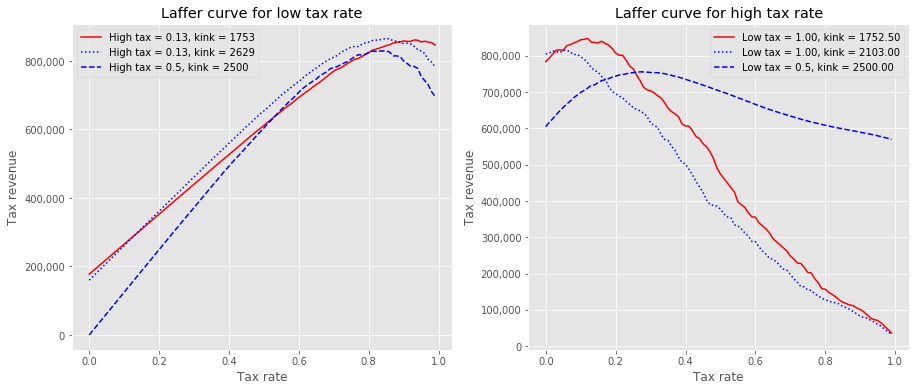

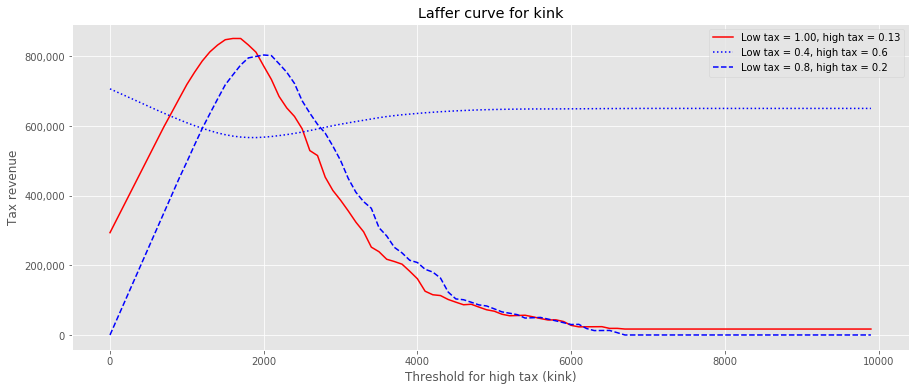

In [23]:
# 1) Define a function which return a list of tax revenues for differente low tax rates given the high tax rate and the kink
def laffer_fun_low(tax_high,kink):
    x=0
    listen = []
    xlist = []
    increment = 0.01
    while x<1:
        xlist.append(x)
        listen.append(calc_tau(alphas_list, epsilons_list, x, tax_high, kink)[0])
        x += increment
    return listen, xlist

# 2) Define a function which return a list of tax revenues for differente high tax rates given the low tax rate and the kink
def laffer_fun_high(tax_low,kink):
    x=0
    listen = []
    xlist = []
    increment = 0.01
    while x<1:
        xlist.append(x)
        listen.append(calc_tau(alphas_list, epsilons_list, tax_low, x, kink)[0])
        x += increment
    return listen, xlist

# 3) Define a function which return a list of tax revenues for differente kinks given the low tax rate and the high tax
def laffer_fun_kink(tax_low,tax_high):
    x=0
    listen = []
    xlist = []
    increment = 100
    while x<10000:
        xlist.append(x)
        listen.append(calc_tau(alphas_list, epsilons_list, tax_low, tax_high, x)[0])
        x += increment
    return listen, xlist

# 4) Make list containing the tax revenues for all low tax rate for differente high tax rates and kinks
x = laffer_fun_low(0,4752)[1]
low_1 = laffer_fun_low(result.x[1],result.x[2])[0]
low_2 = laffer_fun_low(result.x[1],result.x[2]*1.15)[0]
low_3 = laffer_fun_low(0,mu_alpha_a/2)[0]

# 5) Make list containing the tax revenues for all high tax rate for differente low tax rates and kinks
high_1 = laffer_fun_high(result.x[0],result.x[2])[0]
high_2 = laffer_fun_high(result.x[0],result.x[2]*1.15)[0]
high_3 = laffer_fun_high(0.5,mu_alpha_a/2)[0]

# 6) Make list containing the tax revenues for all kinks for differente low tax rates and high tax rates
x_kink = laffer_fun_kink(result.x[0],result.x[1])[1]
kink_1 = laffer_fun_kink(result.x[0],result.x[1])[0]
kink_2 = laffer_fun_kink(0.4,0.6)[0]
kink_3 = laffer_fun_kink(1,0)[0]

# 7) Print the plots
import matplotlib

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# 8) Tax revenue as a function of the low tax rate
ax1.plot(x,low_1, color='r')
ax1.plot(x,low_2, color='b', linestyle=':')
ax1.plot(x,low_3, color='b', linestyle='--')
ax1.legend([f'High tax = {result.x[1]:.2f}, kink = {result.x[2]:.0f}',f'High tax = {result.x[1]:.2f}, kink = {result.x[2]*1.5:.0f}',f'High tax = 0.5, kink = {mu_alpha_a/2:.0f}'])
ax1.set_ylabel('Tax revenue')
ax1.set_xlabel('Tax rate')
ax1.set_title('Laffer curve for low tax rate')

# 9) Tax revenue as a function of the low tax rate
ax2.plot(x,high_1, color='r')
ax2.plot(x,high_2, color='b', linestyle=':')
ax2.plot(x,high_3, color='b', linestyle='--')
ax2.legend([f'Low tax = {result.x[0]:.2f}, kink = {result.x[2]:.2f}',f'Low tax = {result.x[0]:.2f}, kink = {result.x[2]*1.2:.2f}',f'Low tax = 0.5, kink = {mu_alpha_a/2:.2f}'])
ax2.set_ylabel('Tax revenue')
ax2.set_xlabel('Tax rate')
ax2.set_title('Laffer curve for high tax rate')
plt.show()

# 10) Tax revenue as a function of the kink
fig, ax3 = plt.subplots(1, 1, figsize=(15, 6))
ax3.get_yaxis().set_major_formatter(
matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax3.plot(x_kink,kink_1, color='r')
ax3.plot(x_kink,kink_2, color='b', linestyle=':')
ax3.plot(x_kink,kink_3, color='b', linestyle='--')
ax3.set_ylabel('Tax revenue')
ax3.set_xlabel('Threshold for high tax (kink)')
ax3.set_title('Laffer curve for kink')
ax3.legend([f'Low tax = {result.x[0]:.2f}, high tax = {result.x[1]:.2f}',f'Low tax = 0.4, high tax = 0.6',f'Low tax = 0.8, high tax = 0.2'])

plt.show()



To see how the tax rate affect the agents behavior, we have below made a histogram which plots the distribution of the tax payments and the taxable income as a function of the three tax parameters. The function also prints the tax revenue.

In [24]:
# 1) Make a function which plots a histogram over the tax payments and the taxable income
def histo(tax_low=1, tax_high=0, kink=4000):
    plt.figure(figsize=(12,8))
    graf = calc_tau(alphas_list, epsilons_list, tax_low, tax_high, kink)
    tax_max = max(graf[2])
    bins = np.linspace(0, tax_max, 50)
    plt.hist(graf[1], bins=bins, color='r', alpha=0.5)
    plt.hist(graf[2], bins=bins, color='b', alpha=0.5)
    plt.legend(['Tax payment', 'Taxable income'])
    plt.show()
    print(f'The tax provenue is {graf[0]:,.0f}')

widgets.interact(histo,
    tax_low=widget_ml, tax_high=widget_mh, kink=widget_kink
);

interactive(children=(FloatSlider(value=0.5, description='$m_l$:', layout=Layout(width='500px'), max=1.0, step…

### Conclusion

In this project, we have examined how people react to changes in the marginal tax rate. We have found that a larger marginal tax rate and a higher elasticity affect the labor supply negatively in a proportional tax system. This is shown analytically and by a graph, where one can change the parameter values.

Most Western countries apply a progressive tax system, where high-income earners face a greater marginal tax rate. We show analyticcaly that initial top tax payers only are affected by the largest marginal tax rate. We have shown in the graph that people will tend to bunch at the kink, so they earn the highest possible income without having to pay the largest marginal tax rate. This is in line with the literature. 